# Instructions

### Objective: generate 2 sine waves. In which, each has its frequency corresponding to the key pressed.

1º Step: prompt the user for a key to be pressed in a DTMF numeric keyboard (dual tone multi-frequency).

2º Step: generate the two sine waves corresponding to the key pressed, according to the DTMF table, for enough time so the audio can be recorded by the other application.

3º Step: Set the sine waves to a sampling rate of 44100 samples per second, generating a time list.

4º Step: Plot two graphics, one for the signal played and other for the Fourier transform (as the frequencies are high, you must plot just some points, or in this case some periods, so you'll be able to see the signal).

Obs1: The sine wave can be made using the following equation: $$f(t)=A*sin(2*\pi*t)$$
With the A (sine amplitude) as value 1. The size of the time list is related to the duration of the audio.

Obs2: sum the two sine waves to generate the audio signal. You can use the library ```sounddevice``` to play the audio signal and record it with your phone.

In [33]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import math
from suaBibSignal import *

In [34]:
print('Starting encoder')
print('Generating base tones')
sampling_rate = 44100 # signal processing (discrete)
signal = signalMeu() # makes an instance of the class used to generate the signal
frequency_table = [[941, 1336],[697, 1209],[697, 1336],[697, 1477],[770, 1209],[770, 1336],[770, 1477],[852, 1209],[852, 1336],[852, 1477]] # list of corresponding frequencies for each number in DMTF table
period = 1/sampling_rate # period of the signal
amplitude = 1 # amplitude of the signal
duration = 7 # duration of the signal


Starting encoder
Generating base tones


In [35]:
NUM = int(input('Type the number you want to dial, from 0 to 9: '))
print(f'Generating tone corresponding to symbol: {NUM}')
time = np.arange(0, duration, period)
f, f_line = frequency_table[NUM][0], frequency_table[NUM][1]
tone = []

for t in time: # f(t) = A * sin(wt)
    tone.append((amplitude * math.sin(2 * np.pi * f * t)) + (amplitude * math.sin(2 * np.pi * f_line * t))) # generates the sine wave


Generating tone corresponding to symbol: 4


Executing sine waves (playing sound)


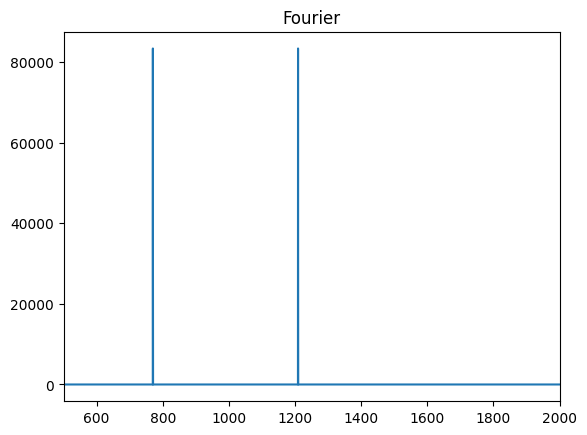

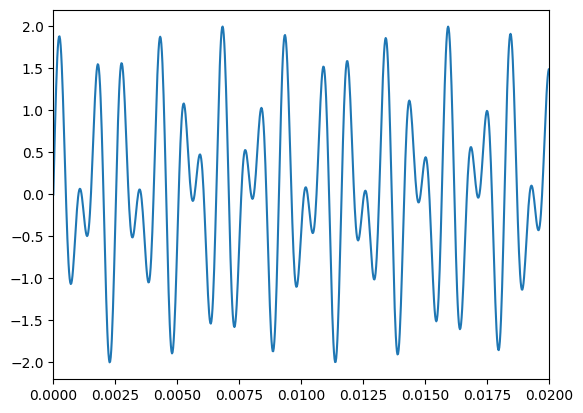

In [36]:
print('Executing sine waves (playing sound)')
sd.play(tone, sampling_rate) # plays the signal
sd.wait() # waits for the end of the audio

signal.plotFFT(tone, sampling_rate)
plt.xlim(500, 2000)
plt.show()

plt.plot(time, tone)
plt.xlim(0, 0.02)
plt.show()
